In [39]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import qiskit
import glob
import os
import random
import math

import time
time.sleep(0*60) #secs
   
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit import visualization
from itertools import permutations
from qiskit.providers.aer.noise import NoiseModel


from qiskit.pulse import Schedule, Gaussian, SamplePulse, DriveChannel, ControlChannel
from qiskit import IBMQ, Aer, transpile, schedule as build_schedule

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import CrosstalkAdaptiveSchedule

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append('..')
from qcg.generators import gen_BV

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl')


device = 'ibmq_manhattan'



backend_names = [device]
backends = {}
maps = {}
noise_model = {}
basis_gates = {}


for item in backend_names:
    backends[item] = provider.get_backend(item)
    maps[item] = backends[item].configuration().coupling_map
    noise_model[item] =  NoiseModel.from_backend(backends[item])
    basis_gates[item] = noise_model[item].basis_gates


sim = Aer.get_backend('qasm_simulator')

config = backends[device].configuration()

time_vals = []
time_each = []


###############
def callback_func(**kwargs):
    pass_ = kwargs['pass_']
    time = kwargs['time']
    #print("Pass:",pass_)
    #print("Time:",time)
    #print (time)
    time_each.append(time)
    time_each.sort()


def make_BV_bench(n_qubits,in_state):
    qc= gen_BV(secret=in_state,barriers=False,regname='q')
    cr = ClassicalRegister(n_qubits,'c')
    qc.add_register(cr)
    for i in range(0,n_qubits):
        qc.measure(i,i)
    return qc
  

sim = Aer.get_backend('qasm_simulator')


################### Eval ########################
for i in range(3,65):
    print("Itn:",i)
    time_each = []
    qc3 = make_BV_bench(n_qubits=i,in_state=['1']*i)
    qc = transpile(qc3,backends[device],callback=callback_func, optimization_level=3)
    time_vals.append(time_each)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ibmqfactory.load_account:WARNING:2020-12-01 13:53:14,086: Credentials are already in use. The existing account in the session will be replaced.


Itn: 3
Itn: 4
Itn: 5
Itn: 6
Itn: 7
Itn: 8
Itn: 9
Itn: 10
Itn: 11
Itn: 12
Itn: 13
Itn: 14
Itn: 15
Itn: 16
Itn: 17
Itn: 18
Itn: 19
Itn: 20
Itn: 21
Itn: 22
Itn: 23
Itn: 24
Itn: 25
Itn: 26
Itn: 27
Itn: 28
Itn: 29
Itn: 30
Itn: 31
Itn: 32
Itn: 33
Itn: 34
Itn: 35
Itn: 36
Itn: 37
Itn: 38
Itn: 39
Itn: 40
Itn: 41
Itn: 42
Itn: 43
Itn: 44
Itn: 45
Itn: 46
Itn: 47
Itn: 48
Itn: 49
Itn: 50
Itn: 51
Itn: 52
Itn: 53
Itn: 54
Itn: 55
Itn: 56
Itn: 57
Itn: 58
Itn: 59
Itn: 60
Itn: 61
Itn: 62
Itn: 63
Itn: 64


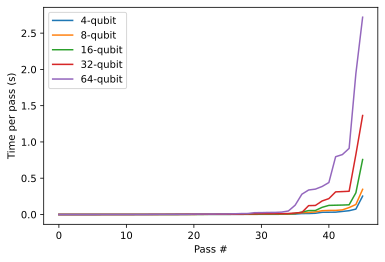

In [65]:
import pydot
from collections import defaultdict
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
from   matplotlib import cm
from   matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.plot(time_vals[2],label='4-qubit')
plt.plot(time_vals[5],label='8-qubit')
plt.plot(time_vals[13],label='16-qubit')
plt.plot(time_vals[29],label='32-qubit')
plt.plot(time_vals[61],label='64-qubit')
plt.legend(loc='best')

#plt.yscale('log')
plt.xlabel('Pass #')
plt.ylabel('Time per pass (s)')
plt.show()

In [53]:
for i in range(65):
    print(i,len(time_vals[i]))

0 43
1 36
2 46
3 36
4 46
5 46
6 46
7 46
8 46
9 46
10 36
11 46
12 36
13 46
14 46
15 46
16 46
17 46
18 46
19 46
20 46
21 46
22 46
23 46
24 46
25 46
26 46
27 46
28 36
29 46
30 46
31 46
32 46
33 46
34 46
35 36
36 46
37 46
38 46
39 46
40 46
41 46
42 46
43 46
44 46
45 46
46 46
47 46
48 46
49 46
50 46
51 46
52 46
53 46
54 46
55 36
56 46
57 56
58 46
59 46
60 46
61 46


IndexError: list index out of range

In [61]:
i=128
print("Itn:",i)
time_each = []
qc3 = make_BV_bench(n_qubits=i,in_state=['1']*i)
qc = transpile(qc3,backends[device],callback=callback_func, optimization_level=3)
time_vals.append(time_each)


Itn: 128


TranspilerError: 'Number of qubits (129) in circuit280394 is greater than maximum (65) in the coupling_map'

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import qiskit
import glob
import os
import random
import math

import time
time.sleep(0*60) #secs
   
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit import visualization
from itertools import permutations
from qiskit.providers.aer.noise import NoiseModel


from qiskit.pulse import Schedule, Gaussian, SamplePulse, DriveChannel, ControlChannel
from qiskit import IBMQ, Aer, transpile, schedule as build_schedule

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import CrosstalkAdaptiveSchedule

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append('..')
from qcg.generators import gen_qft

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl')


device = 'ibmq_manhattan'



backend_names = [device]
backends = {}
maps = {}
noise_model = {}
basis_gates = {}


for item in backend_names:
    backends[item] = provider.get_backend(item)
    maps[item] = backends[item].configuration().coupling_map
    noise_model[item] =  NoiseModel.from_backend(backends[item])
    basis_gates[item] = noise_model[item].basis_gates


sim = Aer.get_backend('qasm_simulator')

config = backends[device].configuration()

time_vals = []
time_each = []


###############
def callback_func(**kwargs):
    pass_ = kwargs['pass_']
    time = kwargs['time']
    #print("Pass:",pass_)
    #print("Time:",time)
    #print (time)
    time_each.append(time)
    time_each.sort()


def make_just_qft_bench(n_qubits,approximation_degree,target_ans=None):
    if target_ans == None:
        qc = gen_qft(n_qubits,approximation_degree,inverse=False,barriers=False, regname='q')
        
        qc3 = qc 
        
    else:
        if len(target_ans) != n_qubits:
            print('target answer does not match circuit size.')
            return 0
        else:
            qr = QuantumRegister(n_qubits,'q')
            init_state = QuantumCircuit(qr)
            for i in range(0,n_qubits):
                if target_ans[i] == '1':
                    init_state.x(n_qubits-1-i)
            qc = gen_qft(n_qubits,approximation_degree,inverse=False,barriers=False, regname='q')

         
            qc3 = init_state + qc 
        
    cr = ClassicalRegister(n_qubits,'c')
    qc3.add_register(cr)
    for i in range(0,n_qubits):
        qc3.measure(i,i)
    
    return qc3

sim = Aer.get_backend('qasm_simulator')


################### Eval ########################
for i in range(3,65):
    print("Itn:",i)
    time_each = []
    qc3 = make_just_qft_bench(n_qubits=i,approximation_degree=6)
    qc = transpile(qc3,backends[device],callback=callback_func, optimization_level=3)
    time_vals.append(time_each)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/Gokul/opt/anaconda3/envs/env_nov19/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Itn: 3
Itn: 4
Itn: 5
Itn: 6
Itn: 7
Itn: 8
Itn: 9
Itn: 10
Itn: 11
Itn: 12
Itn: 13
Itn: 14
Itn: 15
Itn: 16
Itn: 17
Itn: 18
Itn: 19
Itn: 20
Itn: 21
Itn: 22
Itn: 23
Itn: 24
Itn: 25
Itn: 26
Itn: 27
Itn: 28
Itn: 29
Itn: 30
Itn: 31
Itn: 32
Itn: 33
Itn: 34
Itn: 35
Itn: 36
Itn: 37
Itn: 38
Itn: 39
Itn: 40
Itn: 41
Itn: 42
Itn: 43
Itn: 44
Itn: 45
Itn: 46
Itn: 47
Itn: 48
Itn: 49
Itn: 50
Itn: 51
Itn: 52
Itn: 53
Itn: 54
Itn: 55
Itn: 56
Itn: 57
Itn: 58
Itn: 59
Itn: 60
Itn: 61
Itn: 62
Itn: 63
Itn: 64


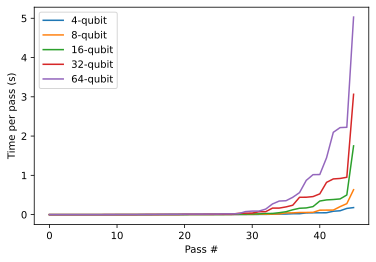

In [3]:
import pydot
from collections import defaultdict
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
from   matplotlib import cm
from   matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.plot(time_vals[2],label='4-qubit')
plt.plot(time_vals[5],label='8-qubit')
plt.plot(time_vals[13],label='16-qubit')
plt.plot(time_vals[29],label='32-qubit')
plt.plot(time_vals[61],label='64-qubit')
plt.legend(loc='best')

#plt.yscale('log')
plt.xlabel('Pass #')
plt.ylabel('Time per pass (s)')
plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ibmqfactory.load_account:WARNING:2020-12-14 11:43:59,051: Credentials are already in use. The existing account in the session will be replaced.


Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4
Itn: 4


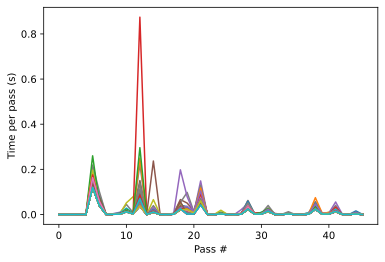

In [18]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import qiskit
import glob
import os
import random
import math

import time
time.sleep(0*60) #secs
   
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit import visualization
from itertools import permutations
from qiskit.providers.aer.noise import NoiseModel


from qiskit.pulse import Schedule, Gaussian, SamplePulse, DriveChannel, ControlChannel
from qiskit import IBMQ, Aer, transpile, schedule as build_schedule

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import CrosstalkAdaptiveSchedule

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append('..')
from qcg.generators import gen_qft

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl')


device = 'ibmq_manhattan'



backend_names = [device]
backends = {}
maps = {}
noise_model = {}
basis_gates = {}


for item in backend_names:
    backends[item] = provider.get_backend(item)
    maps[item] = backends[item].configuration().coupling_map
    noise_model[item] =  NoiseModel.from_backend(backends[item])
    basis_gates[item] = noise_model[item].basis_gates


sim = Aer.get_backend('qasm_simulator')

config = backends[device].configuration()

time_vals = []
time_each = []


###############
def callback_func(**kwargs):
    pass_ = kwargs['pass_']
    time = kwargs['time']
    #print("Pass:",pass_)
    #print("Time:",time)
    #print (time,pass_)
    time_each.append(time)
    #time_each.sort()


def make_just_qft_bench(n_qubits,approximation_degree,target_ans=None):
    if target_ans == None:
        qc = gen_qft(n_qubits,approximation_degree,inverse=False,barriers=False, regname='q')
        
        qc3 = qc 
        
    else:
        if len(target_ans) != n_qubits:
            print('target answer does not match circuit size.')
            return 0
        else:
            qr = QuantumRegister(n_qubits,'q')
            init_state = QuantumCircuit(qr)
            for i in range(0,n_qubits):
                if target_ans[i] == '1':
                    init_state.x(n_qubits-1-i)
            qc = gen_qft(n_qubits,approximation_degree,inverse=False,barriers=False, regname='q')

         
            qc3 = init_state + qc 
        
    cr = ClassicalRegister(n_qubits,'c')
    qc3.add_register(cr)
    for i in range(0,n_qubits):
        qc3.measure(i,i)
    
    return qc3

sim = Aer.get_backend('qasm_simulator')


################### Eval ########################
for n in range(100):
    for i in range(4,5,1):
        print("Itn:",i)
        time_each = []
        qc3 = make_just_qft_bench(n_qubits=i,approximation_degree=6)
        qc = transpile(qc3,backends[device],callback=callback_func, optimization_level=3)
        time_vals.append(time_each)

import pydot
from collections import defaultdict
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
from   matplotlib import cm
from   matplotlib.ticker import LinearLocator, FormatStrFormatter

for n in range(100):
    plt.plot(time_vals[n],label=n)

#plt.legend(loc='best')

#plt.yscale('log')
plt.xlabel('Pass #')
plt.ylabel('Time per pass (s)')
plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ibmqfactory.load_account:WARNING:2020-12-14 11:52:05,277: Credentials are already in use. The existing account in the session will be replaced.


Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64


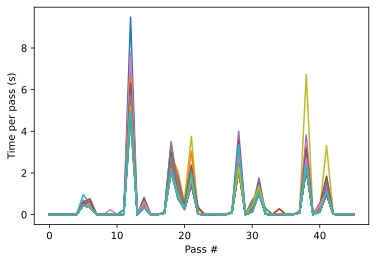

In [19]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import qiskit
import glob
import os
import random
import math

import time
time.sleep(0*60) #secs
   
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit import visualization
from itertools import permutations
from qiskit.providers.aer.noise import NoiseModel


from qiskit.pulse import Schedule, Gaussian, SamplePulse, DriveChannel, ControlChannel
from qiskit import IBMQ, Aer, transpile, schedule as build_schedule

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import CrosstalkAdaptiveSchedule

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append('..')
from qcg.generators import gen_qft

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl')


device = 'ibmq_manhattan'



backend_names = [device]
backends = {}
maps = {}
noise_model = {}
basis_gates = {}


for item in backend_names:
    backends[item] = provider.get_backend(item)
    maps[item] = backends[item].configuration().coupling_map
    noise_model[item] =  NoiseModel.from_backend(backends[item])
    basis_gates[item] = noise_model[item].basis_gates


sim = Aer.get_backend('qasm_simulator')

config = backends[device].configuration()

time_vals = []
time_each = []


###############
def callback_func(**kwargs):
    pass_ = kwargs['pass_']
    time = kwargs['time']
    #print("Pass:",pass_)
    #print("Time:",time)
    #print (time,pass_)
    time_each.append(time)
    #time_each.sort()


def make_just_qft_bench(n_qubits,approximation_degree,target_ans=None):
    if target_ans == None:
        qc = gen_qft(n_qubits,approximation_degree,inverse=False,barriers=False, regname='q')
        
        qc3 = qc 
        
    else:
        if len(target_ans) != n_qubits:
            print('target answer does not match circuit size.')
            return 0
        else:
            qr = QuantumRegister(n_qubits,'q')
            init_state = QuantumCircuit(qr)
            for i in range(0,n_qubits):
                if target_ans[i] == '1':
                    init_state.x(n_qubits-1-i)
            qc = gen_qft(n_qubits,approximation_degree,inverse=False,barriers=False, regname='q')

         
            qc3 = init_state + qc 
        
    cr = ClassicalRegister(n_qubits,'c')
    qc3.add_register(cr)
    for i in range(0,n_qubits):
        qc3.measure(i,i)
    
    return qc3

sim = Aer.get_backend('qasm_simulator')


################### Eval ########################
for n in range(100):
    for i in range(64,65,1):
        print("Itn:",i)
        time_each = []
        qc3 = make_just_qft_bench(n_qubits=i,approximation_degree=6)
        qc = transpile(qc3,backends[device],callback=callback_func, optimization_level=3)
        time_vals.append(time_each)

import pydot
from collections import defaultdict
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
from   matplotlib import cm
from   matplotlib.ticker import LinearLocator, FormatStrFormatter

for n in range(100):
    plt.plot(time_vals[n])

#plt.legend(loc='best')

#plt.yscale('log')
plt.xlabel('Pass #')
plt.ylabel('Time per pass (s)')
plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ibmqfactory.load_account:WARNING:2020-12-14 16:06:32,275: Credentials are already in use. The existing account in the session will be replaced.


Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5
Itn: 5


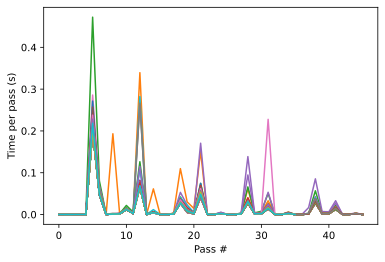

In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import qiskit
import glob
import os
import random
import math

import time
time.sleep(0*60) #secs
   
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit import visualization
from itertools import permutations
from qiskit.providers.aer.noise import NoiseModel


from qiskit.pulse import Schedule, Gaussian, SamplePulse, DriveChannel, ControlChannel
from qiskit import IBMQ, Aer, transpile, schedule as build_schedule

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import CrosstalkAdaptiveSchedule

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append('..')
from qcg.generators import gen_qft
from qcg.generators import gen_BV


IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl')


device = 'ibmq_manhattan'



backend_names = [device]
backends = {}
maps = {}
noise_model = {}
basis_gates = {}


for item in backend_names:
    backends[item] = provider.get_backend(item)
    maps[item] = backends[item].configuration().coupling_map
    noise_model[item] =  NoiseModel.from_backend(backends[item])
    basis_gates[item] = noise_model[item].basis_gates


sim = Aer.get_backend('qasm_simulator')

config = backends[device].configuration()

time_vals = []
time_each = []


###############
def callback_func(**kwargs):
    pass_ = kwargs['pass_']
    time = kwargs['time']
    #print("Pass:",pass_)
    #print("Time:",time)
    #print (time,pass_)
    time_each.append(time)
    #time_each.sort()

    
def make_BV_bench(n_qubits,in_state):
    qc= gen_BV(secret=in_state,barriers=False,regname='q')
    cr = ClassicalRegister(n_qubits,'c')
    qc.add_register(cr)
    for i in range(0,n_qubits):
        qc.measure(i,i)
    return qc
  

sim = Aer.get_backend('qasm_simulator')    

################### Eval ########################
for n in range(100):
    for i in range(5,6,1):
        print("Itn:",i)
        time_each = []
        #qc3 = make_just_qft_bench(n_qubits=i,approximation_degree=6)
        qc3 = make_BV_bench(n_qubits=i,in_state=['1']*i)
        qc = transpile(qc3,backends[device],callback=callback_func, optimization_level=3)
        time_vals.append(time_each)

import pydot
from collections import defaultdict
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
from   matplotlib import cm
from   matplotlib.ticker import LinearLocator, FormatStrFormatter

for n in range(100):
    plt.plot(time_vals[n])

#plt.legend(loc='best')

#plt.yscale('log')
plt.xlabel('Pass #')
plt.ylabel('Time per pass (s)')
plt.show()






The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ibmqfactory.load_account:WARNING:2020-12-14 16:14:32,567: Credentials are already in use. The existing account in the session will be replaced.


Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64
Itn: 64


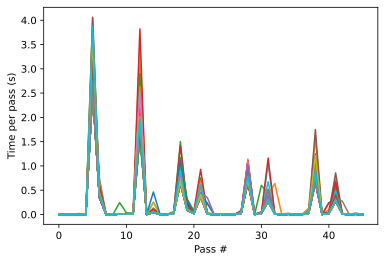

In [22]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import qiskit
import glob
import os
import random
import math

import time
time.sleep(0*60) #secs
   
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit import visualization
from itertools import permutations
from qiskit.providers.aer.noise import NoiseModel


from qiskit.pulse import Schedule, Gaussian, SamplePulse, DriveChannel, ControlChannel
from qiskit import IBMQ, Aer, transpile, schedule as build_schedule

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import CrosstalkAdaptiveSchedule

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append('..')
from qcg.generators import gen_qft
from qcg.generators import gen_BV


IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl')


device = 'ibmq_manhattan'



backend_names = [device]
backends = {}
maps = {}
noise_model = {}
basis_gates = {}


for item in backend_names:
    backends[item] = provider.get_backend(item)
    maps[item] = backends[item].configuration().coupling_map
    noise_model[item] =  NoiseModel.from_backend(backends[item])
    basis_gates[item] = noise_model[item].basis_gates


sim = Aer.get_backend('qasm_simulator')

config = backends[device].configuration()

time_vals = []
time_each = []


###############
def callback_func(**kwargs):
    pass_ = kwargs['pass_']
    time = kwargs['time']
    #print("Pass:",pass_)
    #print("Time:",time)
    #print (time,pass_)
    time_each.append(time)
    #time_each.sort()

    
def make_BV_bench(n_qubits,in_state):
    qc= gen_BV(secret=in_state,barriers=False,regname='q')
    cr = ClassicalRegister(n_qubits,'c')
    qc.add_register(cr)
    for i in range(0,n_qubits):
        qc.measure(i,i)
    return qc
  

sim = Aer.get_backend('qasm_simulator')    

################### Eval ########################
for n in range(100):
    for i in range(64,65,1):
        print("Itn:",i)
        time_each = []
        #qc3 = make_just_qft_bench(n_qubits=i,approximation_degree=6)
        qc3 = make_BV_bench(n_qubits=i,in_state=['1']*i)
        qc = transpile(qc3,backends[device],callback=callback_func, optimization_level=3)
        time_vals.append(time_each)

import pydot
from collections import defaultdict
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
from   matplotlib import cm
from   matplotlib.ticker import LinearLocator, FormatStrFormatter

for n in range(100):
    plt.plot(time_vals[n])

#plt.legend(loc='best')

#plt.yscale('log')
plt.xlabel('Pass #')
plt.ylabel('Time per pass (s)')
plt.show()

